<a href="https://colab.research.google.com/github/smit977/Machine-learning-/blob/master/FIPI_PDEU_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# **DATA EXPLORATION**

In [2]:
#read data
train=pd.read_excel("/content/drive/MyDrive/dataset/kk/input_data_quiz.xlsx")
test=pd.read_excel("/content/drive/MyDrive/dataset/kk/test_data_quiz.xlsx")

In [3]:
train.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,5599.0,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,106.806,16.295,92.475,285.0,38889.0,385.0
1,5599.0,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,120.889,53.374,89.620,1870.0,285246.0,7.0
2,5599.0,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,113.718,72.738,80.120,3124.0,509955.0,1.0
3,5599.0,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,116.831,69.996,84.251,2608.0,383427.0,1.0
4,5599.0,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,115.434,71.518,82.359,3052.0,418474.0,5.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NPD_WELL_BORE_CODE        2498 non-null   float64
 1   NPD_WELL_BORE_NAME        2500 non-null   object 
 2   ON_STREAM_HRS             2499 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE     2498 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE  2492 non-null   float64
 5   AVG_DP_TUBING             2493 non-null   float64
 6   AVG_ANNULUS_PRESS         2492 non-null   float64
 7   AVG_CHOKE_SIZE_P          2495 non-null   float64
 8   AVG_WHP_P                 2495 non-null   float64
 9   AVG_WHT_P                 2496 non-null   float64
 10  DP_CHOKE_SIZE             2496 non-null   float64
 11  BORE_OIL_VOL              2490 non-null   float64
 12  BORE_GAS_VOL              2495 non-null   float64
 13  BORE_WAT_VOL              2495 non-null   float64
dtypes: float

In [5]:
test.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NPD_WELL_BORE_CODE        499 non-null    int64  
 1   NPD_WELL_BORE_NAME        499 non-null    object 
 2   ON_STREAM_HRS             499 non-null    float64
 3   AVG_DOWNHOLE_PRESSURE     499 non-null    int64  
 4   AVG_DOWNHOLE_TEMPERATURE  499 non-null    int64  
 5   AVG_DP_TUBING             492 non-null    float64
 6   AVG_ANNULUS_PRESS         493 non-null    float64
 7   AVG_CHOKE_SIZE_P          494 non-null    float64
 8   AVG_WHP_P                 496 non-null    float64
 9   AVG_WHT_P                 493 non-null    float64
 10  DP_CHOKE_SIZE             494 non-null    float64
 11  BORE_GAS_VOL              493 non-null    float64
 12  BORE_WAT_VOL              492 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 50.8+ KB


In [7]:
train.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2498.0,2499.000000,2498.000000,2492.000000,2493.000000,2492.000000,2495.000000,2495.000000,2496.000000,2496.000000,2490.000000,2495.000000,2495.000000
mean,5599.0,21.204106,98.946740,40.659215,97.328776,16.690249,66.177557,52.143907,80.020514,22.623661,1752.616867,255293.340681,2503.943487
std,0.0,6.970983,125.947923,51.722656,74.578452,6.578753,29.862094,24.416289,19.990477,23.531784,1736.284570,245136.405876,2057.812677
min,5599.0,0.000000,0.000000,0.000000,0.058000,0.000000,0.000000,0.000000,0.035000,0.058000,0.000000,0.000000,-458.000000
25%,5599.0,24.000000,0.000000,0.000000,33.614000,13.182000,48.259940,33.560500,79.332250,4.868250,295.500000,46059.000000,54.000000
50%,5599.0,24.000000,0.000000,0.000000,48.992000,16.474500,65.974740,45.963000,88.067500,14.415000,968.500000,149118.000000,3088.000000
75%,5599.0,24.000000,250.771250,106.397250,175.979000,20.661500,99.169365,64.519500,90.552000,32.230250,3056.250000,445882.000000,4554.000000
max,5599.0,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [8]:
test.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL
count,499.0,499.000000,499.0,499.0,492.000000,493.000000,494.000000,496.000000,493.000000,494.000000,493.000000,492.000000
mean,5599.0,23.425571,0.0,0.0,31.069900,20.000225,85.244240,31.243724,77.607957,4.199789,58162.770791,1105.152439
std,0.0,3.116973,0.0,0.0,8.867971,4.506915,27.554155,9.501805,8.006400,8.367061,25900.758834,243.461442
min,5599.0,0.000000,0.0,0.0,1.265000,0.000000,0.127140,1.265000,9.408000,0.255000,0.000000,0.000000
25%,5599.0,24.000000,0.0,0.0,26.518500,18.852000,97.916670,26.520750,77.533000,0.563000,35248.000000,1115.750000
50%,5599.0,24.000000,0.0,0.0,27.571500,20.234000,100.000000,27.603500,79.580000,0.753000,56169.000000,1182.000000
75%,5599.0,24.000000,0.0,0.0,29.661000,21.225000,100.000000,29.692750,80.533000,1.070750,79515.000000,1239.000000
max,5599.0,24.000000,0.0,0.0,110.390000,28.870000,100.000000,110.390000,82.490000,81.751000,108156.000000,1566.000000


In [9]:
train.isna().sum()

NPD_WELL_BORE_CODE           2
NPD_WELL_BORE_NAME           0
ON_STREAM_HRS                1
AVG_DOWNHOLE_PRESSURE        2
AVG_DOWNHOLE_TEMPERATURE     8
AVG_DP_TUBING                7
AVG_ANNULUS_PRESS            8
AVG_CHOKE_SIZE_P             5
AVG_WHP_P                    5
AVG_WHT_P                    4
DP_CHOKE_SIZE                4
BORE_OIL_VOL                10
BORE_GAS_VOL                 5
BORE_WAT_VOL                 5
dtype: int64

In [10]:
test.isna().sum()

NPD_WELL_BORE_CODE          0
NPD_WELL_BORE_NAME          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               7
AVG_ANNULUS_PRESS           6
AVG_CHOKE_SIZE_P            5
AVG_WHP_P                   3
AVG_WHT_P                   6
DP_CHOKE_SIZE               5
BORE_GAS_VOL                6
BORE_WAT_VOL                7
dtype: int64

**DATA CLEANING**

In [11]:
# for better conversion combined both dataset
train['clean'] = 0 
test['clean'] = 1

In [12]:
Final = pd.concat([train,test], axis=0)

In [13]:
Final.shape

(2999, 15)

In [14]:
Final.drop(['NPD_WELL_BORE_CODE','NPD_WELL_BORE_NAME'],axis=1,inplace=True)

In [15]:
#handling null values
Final['ON_STREAM_HRS'].fillna(Final['ON_STREAM_HRS'].mean(), inplace=True)
Final['AVG_DOWNHOLE_PRESSURE'].fillna(Final['AVG_DOWNHOLE_PRESSURE'].mean(), inplace=True)
Final['AVG_DOWNHOLE_TEMPERATURE'].fillna(Final['AVG_DOWNHOLE_TEMPERATURE'].mean(), inplace=True)
Final['AVG_DP_TUBING'].fillna(Final['AVG_DP_TUBING'].mean(), inplace=True)
Final['AVG_ANNULUS_PRESS'].fillna(Final['AVG_ANNULUS_PRESS'].mean(), inplace=True)
Final['AVG_CHOKE_SIZE_P'].fillna(Final['AVG_CHOKE_SIZE_P'].mean(), inplace=True)
Final['AVG_WHP_P'].fillna(Final['AVG_WHP_P'].mean(), inplace=True)
Final['AVG_WHT_P'].fillna(Final['AVG_WHT_P'].mean(), inplace=True)
Final['DP_CHOKE_SIZE'].fillna(Final['DP_CHOKE_SIZE'].mean(), inplace=True)
Final['BORE_GAS_VOL'].fillna(Final['BORE_GAS_VOL'].mean(), inplace=True)
Final['BORE_WAT_VOL'].fillna(Final['BORE_WAT_VOL'].mean(), inplace=True)

In [16]:
Final.isna().sum()

ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         0
AVG_DOWNHOLE_TEMPERATURE      0
AVG_DP_TUBING                 0
AVG_ANNULUS_PRESS             0
AVG_CHOKE_SIZE_P              0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                509
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
clean                         0
dtype: int64

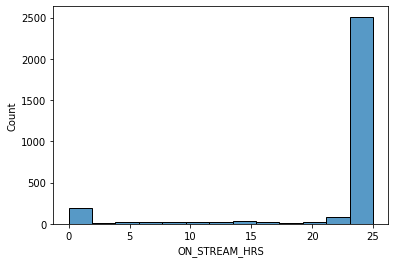

In [17]:
import seaborn as sns
sns.histplot(x=Final['ON_STREAM_HRS'],data=Final)


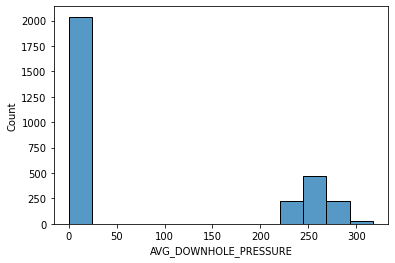

In [18]:
sns.histplot(x=Final['AVG_DOWNHOLE_PRESSURE'],data=Final)


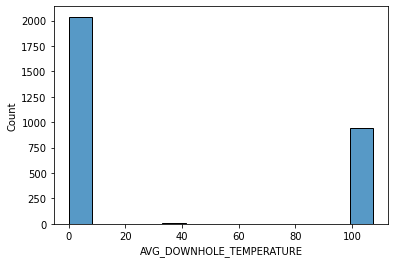

In [19]:
sns.histplot(x=Final['AVG_DOWNHOLE_TEMPERATURE'],data=Final)


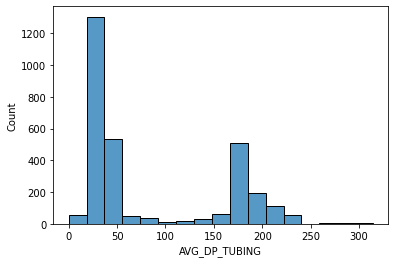

In [20]:
sns.histplot(x=Final['AVG_DP_TUBING'],data=Final)


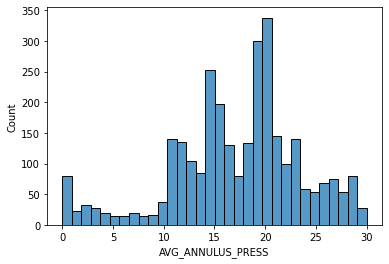

In [21]:
sns.histplot(x=Final['AVG_ANNULUS_PRESS'],data=Final)


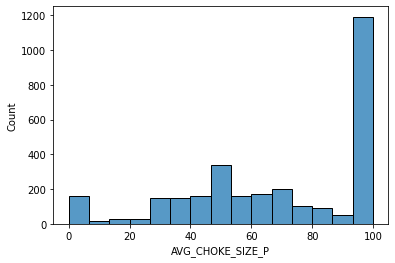

In [22]:
sns.histplot(x=Final['AVG_CHOKE_SIZE_P'],data=Final)


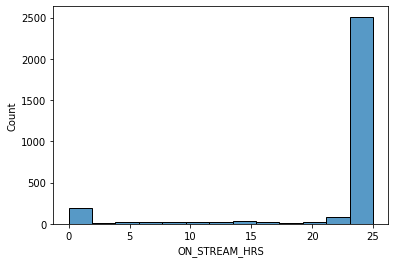

In [23]:
sns.histplot(x=Final['ON_STREAM_HRS'],data=Final)


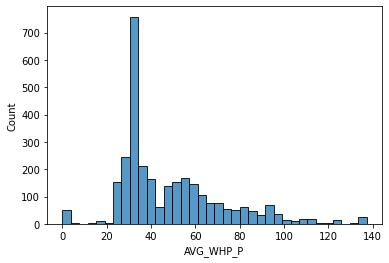

In [24]:
sns.histplot(x=Final['AVG_WHP_P'],data=Final)


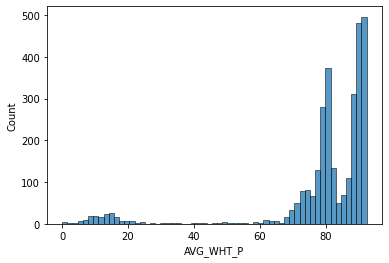

In [25]:
sns.histplot(x=Final['AVG_WHT_P'],data=Final)


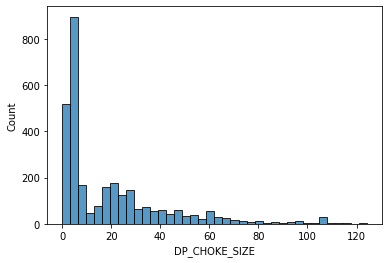

In [26]:
sns.histplot(x=Final['DP_CHOKE_SIZE'],data=Final)


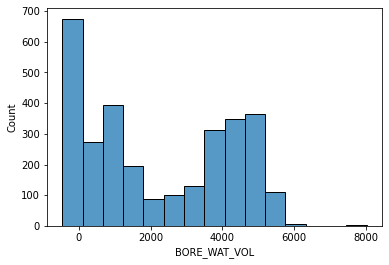

In [27]:
sns.histplot(x=Final['BORE_WAT_VOL'],data=Final)

In [28]:
Final.columns

Index(['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'clean'],
      dtype='object')

In [29]:
#as you can see several data column is not normally distributed (skewed data)

#let's standardize data
minmax=MinMaxScaler()
Final[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE','AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE','BORE_GAS_VOL','BORE_WAT_VOL']]=minmax.fit_transform(Final[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE',
       'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE','BORE_GAS_VOL',
       'BORE_WAT_VOL']])
# X_train=minmax.fit_transform(X_train)
# test_cleaned=minmax.transform(test_cleaned)

In [30]:
Final.isna().sum()

ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         0
AVG_DOWNHOLE_TEMPERATURE      0
AVG_DP_TUBING                 0
AVG_ANNULUS_PRESS             0
AVG_CHOKE_SIZE_P              0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                509
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
clean                         0
dtype: int64

In [31]:
#cleaned data
train_cleaned = Final[Final['clean']==0]
test_cleaned = Final[Final['clean']==1]

In [32]:
train_cleaned['BORE_OIL_VOL'].fillna(train_cleaned['BORE_OIL_VOL'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [33]:
train_cleaned.drop(['clean'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
test_cleaned.drop(['clean','BORE_OIL_VOL'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**MODEL BUILDING**

In [35]:
X_train=train_cleaned.drop('BORE_OIL_VOL',axis=1)
y_train=train_cleaned['BORE_OIL_VOL'].values


In [36]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression


In [37]:
lnr = LinearRegression(normalize=True)

In [38]:
lnr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [39]:
pred_y = lnr.predict(X_train)

In [40]:
from sklearn.metrics import r2_score

In [41]:
acc = r2_score(y_train, pred_y)

In [42]:
acc

0.9934365601057419

In [43]:
#RANDOMFORESTREGRESSOR
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators=250)

In [45]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
y_pred_rf = rf.predict(X_train)

In [47]:
acc_rf = r2_score(y_train, y_pred_rf)

In [48]:
acc_rf

0.9992140069291678

In [49]:
#DECISIONTREEREGRESSOR
from sklearn.tree import DecisionTreeRegressor

In [50]:
dt = DecisionTreeRegressor(max_depth=12)

In [51]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [52]:
dt_pred_y = dt.predict(X_train)

In [53]:
acc_dt = r2_score(y_train, dt_pred_y) 

In [54]:
acc_dt

0.999977553402288

In [55]:
#Now let's predict test data with randomforestregressor

pred=rf.predict(test_cleaned)

In [56]:
test['BORE_OIL_VOL']=np.round(pred,2)

In [57]:
test.drop(['clean'],axis=1,inplace=True)

In [58]:
test.to_excel("/content/drive/MyDrive/dataset/kk/result.xlsx",index=False)

In [59]:
test

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL
0,5599,15/9-F-12,24.0,0,0,52.147,28.714,35.23351,52.147,72.510,23.500,105134.0,712.0,703.06
1,5599,15/9-F-12,24.0,0,0,51.696,28.870,35.46763,51.696,73.466,23.056,105584.0,716.0,704.67
2,5599,15/9-F-12,24.0,0,0,51.508,28.703,35.57401,51.508,72.680,22.845,103868.0,720.0,701.93
3,5599,15/9-F-12,24.0,0,0,51.184,28.510,35.65656,51.184,71.846,22.524,104654.0,732.0,701.47
4,5599,15/9-F-12,24.0,0,0,50.529,28.338,35.71326,50.529,71.837,21.861,105072.0,717.0,701.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5599,15/9-F-12,24.0,0,0,26.999,19.916,40.27530,26.999,77.533,4.719,23020.0,1113.0,176.40
495,5599,15/9-F-12,24.0,0,0,27.094,19.996,40.29969,27.094,76.751,4.817,23270.0,1031.0,177.20
496,5599,15/9-F-12,24.0,0,0,NaN,20.129,40.01120,26.946,78.405,4.665,22802.0,977.0,162.76
497,5599,15/9-F-12,24.0,0,0,27.751,20.234,39.09910,27.751,78.220,5.513,21569.0,968.0,173.27
